In [35]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import colors, ticker, cm   
import matplotlib.cm as cmx
%matplotlib inline
import sys
import os
import pandas as pd
import glob
from matplotlib.backends.backend_pdf import PdfPages 

In [51]:
from scipy.interpolate import interp1d
from astropy.io import fits

In [38]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),   #defines the default image size
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [39]:
from Telescope import *
from Throughputs import *

In [40]:
from lsst.sims.photUtils import SignalToNoise
from lsst.sims.photUtils import PhotometricParameters
from lsst.sims.photUtils import Bandpass,Sed

In [41]:
tel=Telescope(airmass=1,aerosol=False)

Telescope:ZP_filtre ==> hello Cte= 5326.68735237  Diam =  6.423  h= 6.62607004e-34  exp= 15.0
Telescope:ZP_filtre ==> hello Cte= 5326.68735237  Diam =  6.423  h= 6.62607004e-34  exp= 15.0
Telescope:ZP_filtre ==> hello Cte= 5326.68735237  Diam =  6.423  h= 6.62607004e-34  exp= 15.0
Telescope:ZP_filtre ==> hello Cte= 5326.68735237  Diam =  6.423  h= 6.62607004e-34  exp= 15.0
Telescope:ZP_filtre ==> hello Cte= 5326.68735237  Diam =  6.423  h= 6.62607004e-34  exp= 15.0
Telescope:ZP_filtre ==> hello Cte= 5326.68735237  Diam =  6.423  h= 6.62607004e-34  exp= 15.0
Telescope:ZP ==> zeropoints {'u': 26.568808659711557, 'g': 28.354318973347311, 'r': 28.164621348129035, 'i': 27.822281167154159, 'z': 27.428430965039809, 'y': 26.60922520603166} {'u': 146.54784684629368, 'g': 113.3120538362018, 'r': 106.06362523506563, 'i': 103.82733449370409, 'z': 101.60555027615993, 'y': 112.48554270045459}


# Get SED

In [53]:
input_fits='../regenerated_sedgrid_pickle_uvi.fits'

In [55]:
hdul = fits.open(input_fits)

In [56]:
hdr=hdul[0].header
hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 8005                                                  
NAXIS2  =                12963                                                  
NBSED   =                12962                                                  
NBWLBIN =                 8000                                                  
WLMIN   =               3000.0                                                  
WLMAX   =              11000.0                                                  
WLBINWDT=                  1.0                                                  
SEDUNIT = 'FLAM    '                                                            
SEDMODEL= 'pickle_uvi'                                                          
IDX_NUM =                   

In [57]:
index_num=hdr["IDX_NUM"]
index_val=hdr["IDX_VAL"]
#index_temp=hdr["IDX_TEMP"]
#index_logg=hdr["IDX_LOGG"]
#index_logz=hdr["IDX_LOGZ"]
index_spec=hdr["IDX_SPEC"]
#index_mag=hdr["IDX_MAG"]

In [58]:
data = hdul[0].data

In [59]:
data.shape

(12963, 8005)

In [60]:
idx=0

In [61]:
wl=data[0,index_spec:]
flux=data[1+idx,index_spec:]

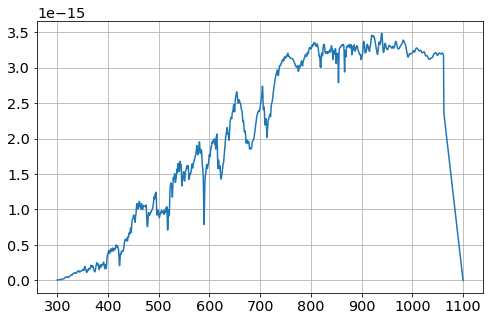

In [65]:
plt.figure(figsize=(8,5))
plt.plot(wl/10,flux*10)
plt.grid(True)

In [66]:
dir(Sed)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_checkUseSelf',
 '_needResample',
 'addCCMDust',
 'calcADU',
 'calcErgs',
 'calcFlux',
 'calcFluxNorm',
 'calcMag',
 'clearSED',
 'flambdaTofnu',
 'fluxFromMag',
 'fnuToflambda',
 'getSED_flambda',
 'getSED_fnu',
 'magFromFlux',
 'manyFluxCalc',
 'manyMagCalc',
 'multiplyFluxNorm',
 'multiplySED',
 'readSED_flambda',
 'readSED_fnu',
 'redshiftSED',
 'renormalizeSED',
 'resampleSED',
 'setFlatSED',
 'setSED',
 'setupCCMab',
 'setupPhiArray',
 'synchronizeSED',
 'writeSED']

In [75]:
mysed=Sed()
mysed.setSED(wavelen=wl/10,flambda=flux*10)

In [79]:
mysed.calcADU()


TypeError: calcADU() missing 2 required positional arguments: 'bandpass' and 'photParams'

In [77]:
?Sed

Init signature: Sed(wavelen=None, flambda=None, fnu=None, badval=nan, name=None)
Docstring:      Class for holding and utilizing spectral energy distributions (SEDs)
Init docstring:
Initialize sed object by giving filename or lambda/flambda array.

Note that this does *not* regrid flambda and leaves fnu undefined.
File:           /sps/lsst/software/lsst_sims/sims_2_7_0/stack/miniconda3-4.3.21-10a4fa6/Linux64/sims_photUtils/2.7.0.sims/python/lsst/sims/photUtils/Sed.py
Type:           type


In [78]:
dir(Sed)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_checkUseSelf',
 '_needResample',
 'addCCMDust',
 'calcADU',
 'calcErgs',
 'calcFlux',
 'calcFluxNorm',
 'calcMag',
 'clearSED',
 'flambdaTofnu',
 'fluxFromMag',
 'fnuToflambda',
 'getSED_flambda',
 'getSED_fnu',
 'magFromFlux',
 'manyFluxCalc',
 'manyMagCalc',
 'multiplyFluxNorm',
 'multiplySED',
 'readSED_flambda',
 'readSED_fnu',
 'redshiftSED',
 'renormalizeSED',
 'resampleSED',
 'setFlatSED',
 'setSED',
 'setupCCMab',
 'setupPhiArray',
 'synchronizeSED',
 'writeSED']